# TP 3 - Introducción al aprendizaje automatizado
### Juan Ignacio Farizano

--------------------------------------------------------------------------------

In [1]:
# Imports iniciales
%matplotlib inline
import math
from common import *
from naivebayes import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

--------------------------------------------------------------------------------
## Ejercicio 1

In [5]:
bins = 5
errors = []

for d in [2 ** i for i in range(1, 6)]:
  x_col_names = list(range(d))
  y_col_name = 'Class'

  # Genero los conjuntos de test para cada d
  df_test_diag = generate_diagonal(d, 10000, 0.78)
  df_test_para = generate_parallel(d, 10000, 0.78)

  X_test_diag, y_test_diag = df_test_diag[x_col_names], df_test_diag[y_col_name]
  X_test_para, y_test_para = df_test_para[x_col_names], df_test_para[y_col_name]

  for i in range(20):
    # Genero los conjuntos de entrenamiento
    df_train_diag = generate_diagonal(d, 250, 0.78)
    df_train_para = generate_parallel(d, 250, 0.78)

    X_train_diag, y_train_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
    X_train_para, y_train_para = df_train_para[x_col_names], df_train_para[y_col_name]

    # Creo las redes neuronales
    clf_diag = GaussianNB()
    clf_para = GaussianNB()

    clf_diag.fit(X_train_diag, y_train_diag)
    clf_para.fit(X_train_para, y_train_para)

    predict_train_diag = clf_diag.predict(X_train_diag)
    predict_test_diag = clf_diag.predict(X_test_diag)
    predict_train_para = clf_para.predict(X_train_para)
    predict_test_para = clf_para.predict(X_test_para)

    actual_error_train_diag = 1 - accuracy_score(y_train_diag, predict_train_diag)
    actual_error_test_diag = 1 - accuracy_score(y_test_diag, predict_test_diag)  
    actual_error_train_para = 1 - accuracy_score(y_train_para, predict_train_para)
    actual_error_test_para = 1 - accuracy_score(y_test_para, predict_test_para)

    errors.append([actual_error_train_diag, d, "Gaussian NB - Train diagonal"])
    errors.append([actual_error_test_diag, d, "Gaussian NB - Test diagonal"])
    errors.append([actual_error_train_para, d, "Gaussian NB - Train parallel"])
    errors.append([actual_error_test_para, d, "Gaussian NB - Test parallel"])

ej1_errors_bayes_df = pd.DataFrame(errors, columns = ["Error", "d", "Class"])
ej1_errors_bayes_df.to_csv("datasets/dimensions/bayes_dimensions_errors.csv", index = False)

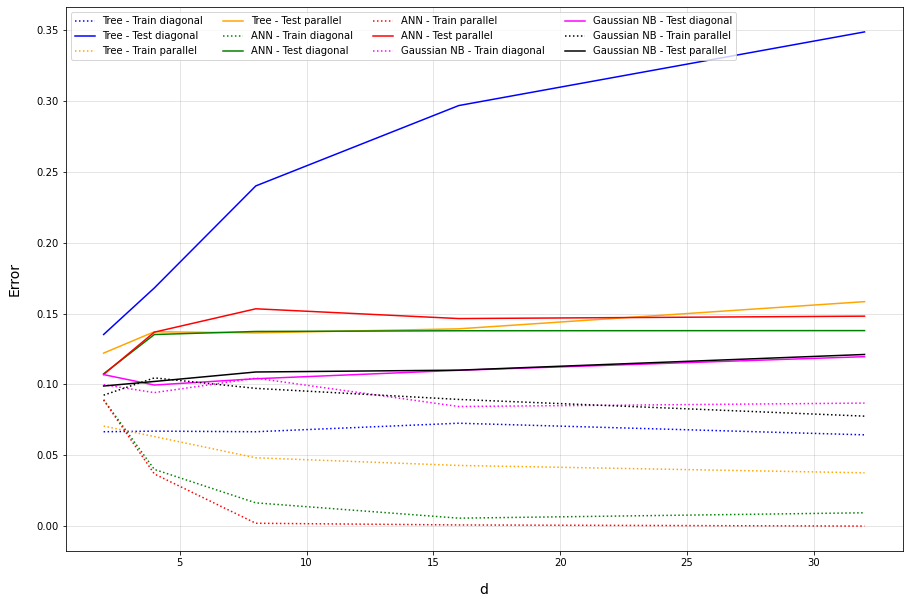

In [6]:
ej1_errors_tree_df = pd.read_csv("datasets/dimensions/tree_dimensions_errors.csv")
ej1_errors_ann_df = pd.read_csv("datasets/dimensions/ann_dimensions_errors.csv")
ej1_errors_bayes_df = pd.read_csv("datasets/dimensions/bayes_dimensions_errors.csv")
ej1_errors_df = pd.concat([ej1_errors_tree_df, ej1_errors_ann_df, ej1_errors_bayes_df])
graph_errors_dimensions(ej1_errors_df)

### Conclusiones


--------------------------------------------------------------------------------
## Ejercicio 2

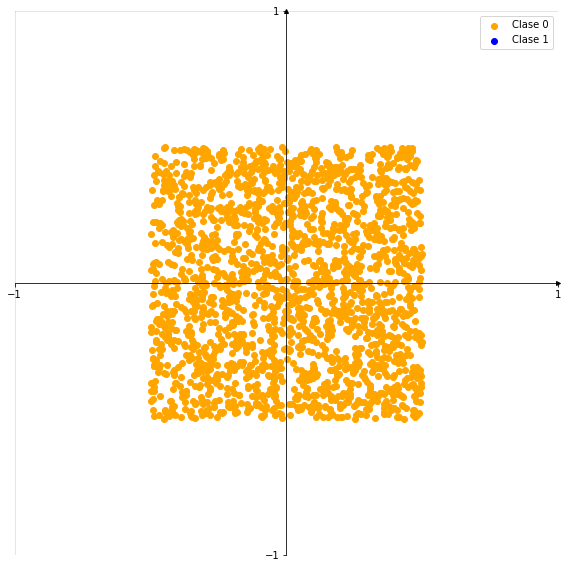

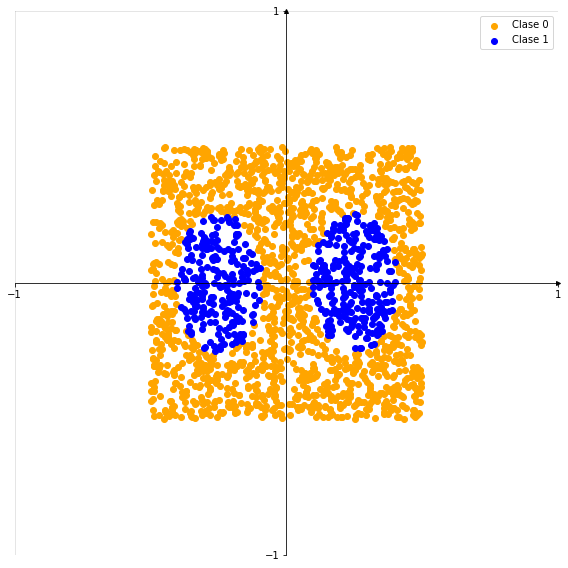

In [4]:
col_names = [0, 1, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_elipses = pd.read_csv("datasets/elipses/dos_elipses.data", header=None, names = col_names)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_elipses[x_col_names], df_data_elipses[y_col_name]
X_train, _, y_train, _ = train_test_split(X, y, random_state=0, test_size=0.2)

# Leo el conjunto de test
df_test_elipses = pd.read_csv("datasets/elipses/dos_elipses.test", header=None, names = col_names)
X_test, y_test = df_test_elipses[x_col_names], df_test_elipses[y_col_name]

clf = GaussianNB()
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)

frame = {0 : X_test[0], 1 : X_test[1], 'Class' : predict_test}

df_predict_test = pd.DataFrame(frame, columns=[0, 1, 'Class'])

graph_df(df_predict_test)

graph_df(df_test_elipses)


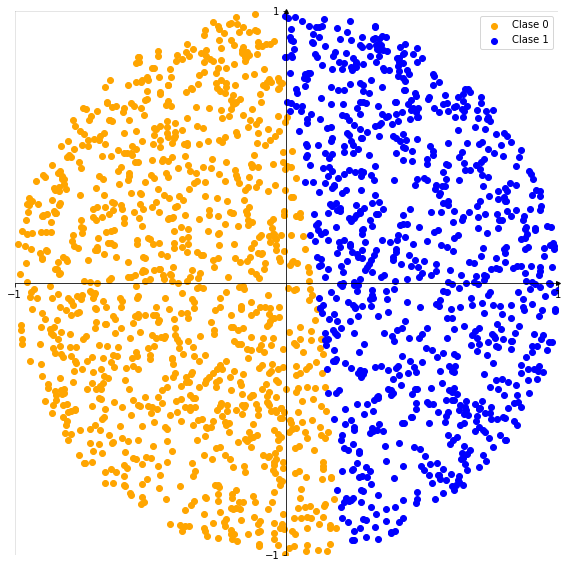

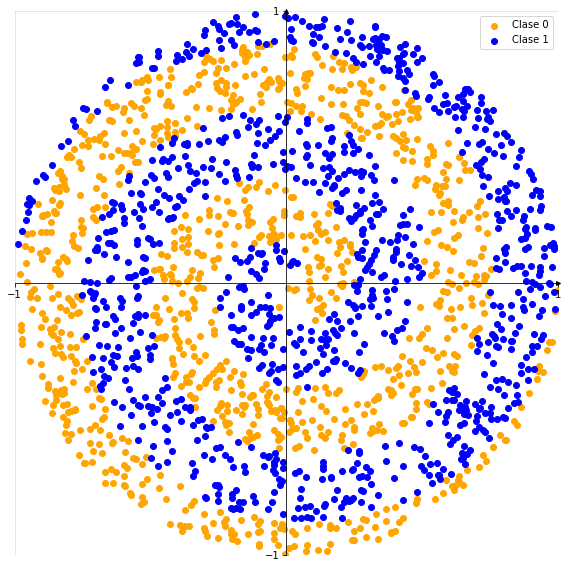

In [7]:
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Creo el conjunto de datos utilizado para entrenar y vaidar
df_data_spirals = generate_spirals(600)
# Separo un 20% al azar para conjunto de validación
X_data, y_data = df_data_spirals[x_col_names], df_data_spirals[y_col_name]
X_train, _, y_train, _ = train_test_split(X_data, y_data, random_state=0, test_size=0.2)

# Genero el conjunto de test
df_test_spirals = generate_spirals(2000)
X_test, y_test = df_test_spirals[x_col_names], df_test_spirals[y_col_name]

clf = GaussianNB()
clf.fit(X_train, y_train)

predict_test = clf.predict(X_test)

frame = {0 : X_test[0], 1 : X_test[1], 'Class' : predict_test}

df_predict_test = pd.DataFrame(frame, columns=[0, 1, 'Class'])

graph_df(df_predict_test)

graph_df(df_test_spirals)

### Conclusiones


--------------------------------------------------------------------------------
## Ejercicio 3

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import CategoricalNB
from copy import deepcopy

def train_Categorical_NB(n_bins, X_train, y_train, X_val, y_val, X_test, y_test):
  best_val_error = math.inf
  
  errors = []

  for bins in n_bins:
    kbdisc = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='uniform')
    kbdisc.fit(X_train)

    X_train_disc = kbdisc.transform(X_train.copy())
    X_val_disc = kbdisc.transform(X_val.copy())
    X_test_disc = kbdisc.transform(X_test.copy())

    clf = CategoricalNB(min_categories=bins)
    clf.fit(X_train_disc, y_train)

    predict_train = clf.predict(X_train_disc)
    predict_val = clf.predict(X_val_disc)
    predict_test= clf.predict(X_test_disc)

    actual_train_error = 1 - accuracy_score(y_train, predict_train)
    actual_val_error = 1 - accuracy_score(y_val, predict_val)
    actual_test_error = 1 - accuracy_score(y_test, predict_test)

    errors.append([actual_train_error, bins, "Train error"])
    errors.append([actual_val_error, bins, "Validation error"])
    errors.append([actual_test_error, bins, "Test error"])

    if actual_val_error < best_val_error:
      best_val_error = actual_val_error
      best_bins = bins
      best_clf = deepcopy(clf)
      best_kbdisc = deepcopy(kbdisc)

  errors_df = pd.DataFrame(errors, columns = ["Error", "Bins", "Class"])

  return best_bins, best_clf, best_kbdisc, errors_df


--------------------------------------------------------------------------------
## Ejercicio 4

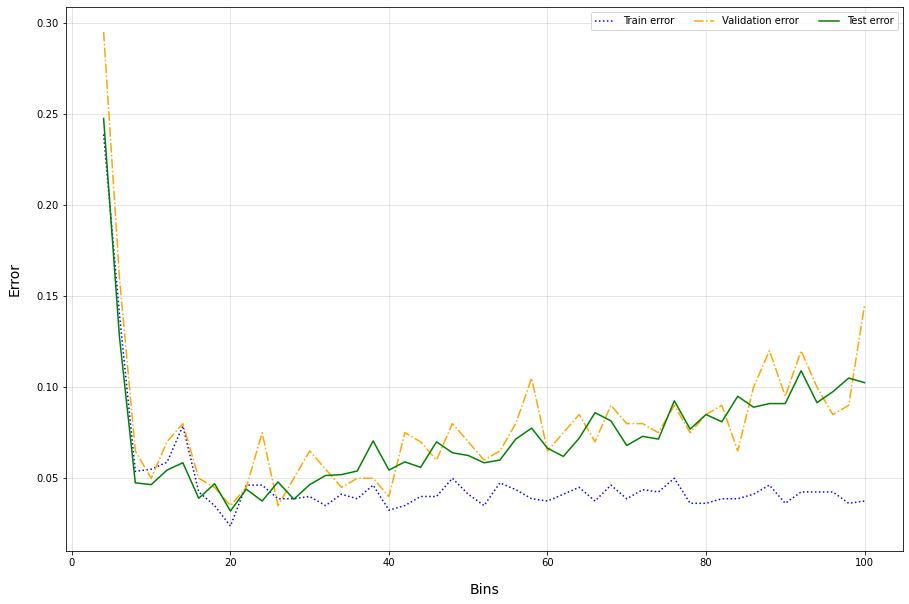

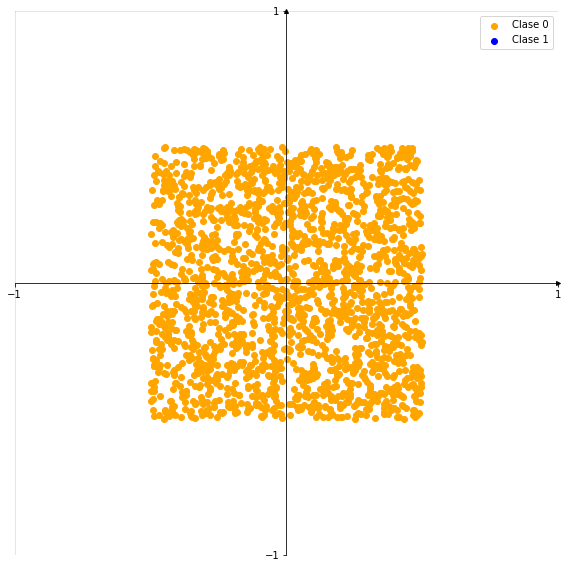

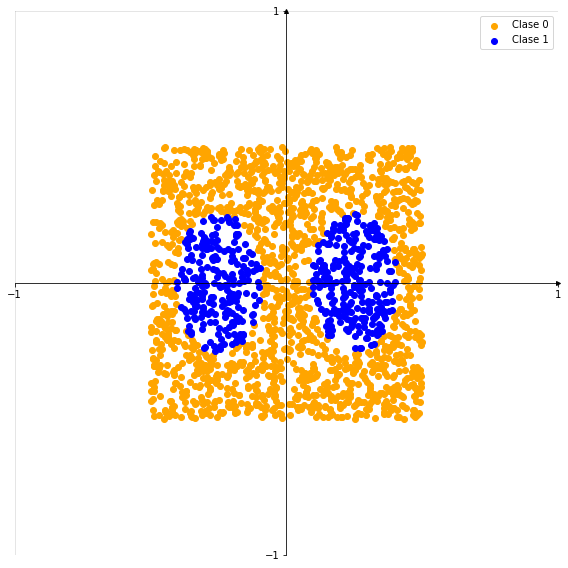

In [8]:
col_names = [0, 1, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_elipses = pd.read_csv("datasets/elipses/dos_elipses.data", header=None, names = col_names)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_elipses[x_col_names], df_data_elipses[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

# Leo el conjunto de test
df_test_elipses = pd.read_csv("datasets/elipses/dos_elipses.test", header=None, names = col_names)
X_test, y_test = df_test_elipses[x_col_names], df_test_elipses[y_col_name]

n_bins = range(4, 102, 2)

best_bins, best_clf, best_kbdisc, errors_df = train_Categorical_NB(n_bins, X_train, y_train, X_val, y_val, X_test, y_test)

graph_errors(errors_df, "Bins")

predict_test = best_clf.predict(X_test)

frame = {0 : X_test[0], 1 : X_test[1], 'Class' : predict_test}

df_predict_test = pd.DataFrame(frame, columns=[0, 1, 'Class'])

graph_df(df_predict_test)

graph_df(df_test_elipses)